<a href="https://colab.research.google.com/github/antaripg/genetic-algorithm-notebooks/blob/main/GeneticAlgorithmCode_RGBImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What are Genetic Algorithms (GA)?
*   Inspired by natural selection process
*   Type of optimization technique that imitates the process of evolution and natural selection

Steps of Operation:
*   Simulating a process of evolution
*   Create a population of candidate solutions to the problem
*   Iteratively repeating - selection, crossover and mutation



The first part of the code below implements a genetic algorithm simulation to find the best RGB values that match a target RGB value. It involves the following 3 steps:

* calc_fitness: calculates the mean absolute difference between an input RGB chromosome and the target RGB values. 2.evolve_population: evolves a population of chromosomes by selecting the best chromosomes (elites), mating them to create offspring, and applying random mutations to the offspring.
* simulate: runs the genetic algorithm simulation by initializing a population of random RGB values, evolving the population over a specified number of generations, and returning the best chromosome found.

The target RGB values are passed as input to the simulate function, and the simulation runs for 50 generations with a population size of 100, mutation rate of 0.01, and 10% of the population being selected as elites. The RGB values and fitness of the best individual in each generation are printed. The final output is the best chromosome found, which is the individual with the minimum fitness value (the closest match to the target RGB).


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Fitness Function - mean absolute difference between two arrays
# Calculate absolute value element wise and then mean

# MEAN ABSOLUTE DIFFERENCE -
print(np.mean(np.abs(np.array([50, 50, 10]) - np.array([255, 0, 0]))))

88.33333333333333


In [ ]:
# Define the Fitness Calculation Function

def calc_fitness(chromosome: np.array, target: np.array):
  '''
    Calculates the mean absolute difference between an input RGB chromosome and the target RGB values.
    Args:
      chromosome (np.array): RGB chromosome to be evaluated
      target (np.array): Target RGB values
    Returns:
      float: Mean absolute difference between the chromosome and the target
  '''
  return np.mean(np.abs(chromosome - target))

In [ ]:
# Define the crossover function

def crossover(parent_1: np.array, parent_2: np.array):
  '''
    Creates a child with a crossover operation between two parents.
    Args:
      parent_1 (np.array): First parent RGB values
      parent_2 (np.array): Second parent RGB values
    Returns:
      np.array: Child RGB values
  '''

  # Create a child chromosome by combining the genes of two parents
  child = np.zeros_like(parent_1)
  for i in range(len(parent_1)):
    if random.random() < 0.5:
      child[i] = parent_1[i]
    else:
      child[i] = parent_2[i]
  return child

In [ ]:
# Define the mutation function

def mutate(child: np.array, mutation_rate: float):
  '''
    Applies a random mutation operation to a chromosome.
    Args:
      child (np.array): RGB chromosome to be mutated
      mutation_rate (float): Mutation rate
    Returns:
      np.array: Mutated RGB chromosome
  '''
  # Mutate the child chromosome with a probability determined by the mutation rate
  for i in range(len(child)):
    if random.random() < mutation_rate:
      child[i] = np.random.randint(0, 256)

  return child


In [ ]:
# Population evolution Function

def evolve_population(population: list, target_rgb: np.array,
                      mutation_rate: float, elite_ratio: int):
  """
    Evolves a population of chromosomes by selecting the best chromosomes (elites), mating them to create offspring, and applying random mutations to the offspring.

    Args:
      population (list): List of RGB chromosomes to be evolved
      target_rgb (np.array): Target RGB values
      mutation_rate (float): Mutation rate for random mutations
      elite_ratio (int): Number of chromosomes to be selected as elites

    Returns:
      List[np.ndarray]: List of evolved RGB chromosomes
  """
  # Calculate the fitness values for each chromosome in the population
  fitness_values = [calc_fitness(chromosome, target_rgb) for chromosome in population]

  # Select the best chromosomes (elites)
  elite_indices = np.argsort(fitness_values)[:int(elite_ratio * len(population))]
  elites = [population[i] for i in elite_indices]

  # Create a new population by mating the elites
  new_population = []
  while len(new_population) < len(population) - len(elites):
    # Select randomly two parents by the elites
    parent_1, parent_2 = random.choices(elites, k=2)

    # Perform mating by crossover
    child = crossover(parent_1=parent_1, parent_2=parent_2)

    # Perform mutation
    if random.random() < mutation_rate:
      child = mutate(child=child, mutation_rate=mutation_rate)

    # Add the child to the new population
    new_population.append(child)

  # Return the evolved population
  return elites + new_population

In [ ]:
# Define the simulate Function

def simulate(size: int, target_rgb: np.array, mutation_rate: float, elite_ratio: int, generations: int):
  '''
    Simulates the genetic algorithm process to find the best RGB values that match a target RGB value.

    Args:
      size (int): Population size
      target_rgb (np.array): Target RGB values
      mutation_rate (float): Mutation rate for random mutations
      elite_ratio (int): Number of chromosomes to be selected as elites
      generations (int): Number of generations to evolve
    Returns:
      np.array: Best RGB chromosome found
      float: Best fitness value found
  '''

  # Initialize the population with random RGB values
  population = np.random.randint(0, 256, size=(size, 3))

  # Evolve the population over a specified number of generations
  for i in range(generations):

    # Evolve the population by selecting elites, mutating, and recombining
    population = evolve_population(population, target_rgb, mutation_rate, elite_ratio)

    # Get the individual with best fitness (closest to target RGB)
    best_individual = population[np.argmin([calc_fitness(chromosome, target_rgb) for chromosome in population])]
    print(f"Generation {i+1}: Best RGB = {best_individual}, Fitness = {calc_fitness(best_individual, target_rgb)}")

  # Return the best individual candidate and the best fitness value for that individual
  return best_individual, calc_fitness(best_individual, target_rgb)


In [ ]:
target_rgb = np.array([255, 255, 0])
size = 100
mutation_rate = 0.01
elite_ratio = 0.1
generations = 50

In [ ]:
%%time
best_camouflage = simulate(size=size,
                           target_rgb=target_rgb,
                           mutation_rate=mutation_rate,
                           elite_ratio=elite_ratio,
                           generations=generations)

print(f"Target is {target_rgb}")
print(f"Best camouflage is {best_camouflage[0]} with fitness {best_camouflage[1]}")

Generation 1: Best RGB = [252 239  25], Fitness = 14.666666666666666
Generation 2: Best RGB = [250 247   7], Fitness = 6.666666666666667
Generation 3: Best RGB = [252 249   7], Fitness = 5.333333333333333
Generation 4: Best RGB = [252 249   7], Fitness = 5.333333333333333
Generation 5: Best RGB = [252 249   7], Fitness = 5.333333333333333
Generation 6: Best RGB = [252 249   7], Fitness = 5.333333333333333
Generation 7: Best RGB = [252 249   7], Fitness = 5.333333333333333
Generation 8: Best RGB = [252 249   7], Fitness = 5.333333333333333
Generation 9: Best RGB = [252 249   7], Fitness = 5.333333333333333
Generation 10: Best RGB = [252 249   7], Fitness = 5.333333333333333
Generation 11: Best RGB = [252 249   7], Fitness = 5.333333333333333
Generation 12: Best RGB = [252 249   7], Fitness = 5.333333333333333
Generation 13: Best RGB = [252 249   7], Fitness = 5.333333333333333
Generation 14: Best RGB = [252 249   7], Fitness = 5.333333333333333
Generation 15: Best RGB = [252 249   7], F

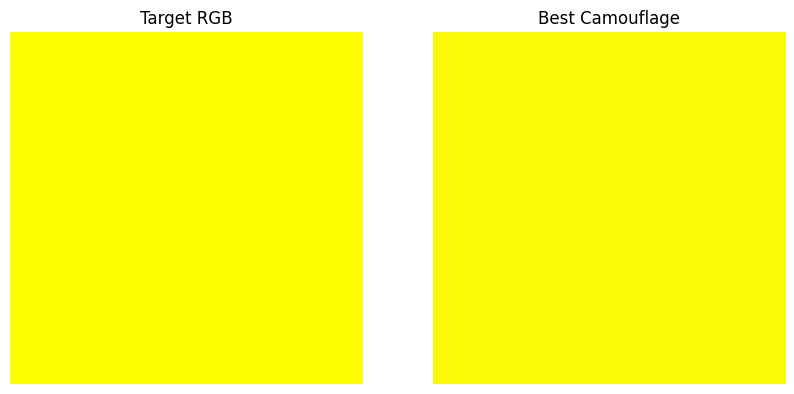

In [ ]:
# Plot the best candidate and target RGB

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(np.reshape(target_rgb/255, (1, 1, 3)))
ax[0].set_title("Target RGB")
ax[0].axis("off")

ax[1].imshow(np.reshape(best_camouflage[0]/255, (1, 1, 3)))
ax[1].set_title("Best Camouflage")
ax[1].axis("off")

plt.show()

#### Extended to 2 D Images

In [ ]:
# Define the Fitness Calculation Function

def calc_fitness(chromosome: np.array, target_grid: np.array):
  '''
    Calculates the mean absolute difference between an input RGB chromosome and the target RGB values.
    Args:
      chromosome (np.array): RGB chromosome to be evaluated
      target_grid (np.array): Target RGB values
    Returns:
      float: Mean absolute difference between the chromosome and the target
  '''
  return np.mean(np.abs(chromosome - target_grid))

# Define the crossover function

def crossover(parent_1: np.array, parent_2: np.array):
  '''
    Creates a child with a crossover operation between two parents.
    Args:
      parent_1 (np.array): First parent RGB values
      parent_2 (np.array): Second parent RGB values
    Returns:
      np.array: Child RGB values
  '''

  # Create a child chromosome by combining the genes of two parents
  child = np.zeros_like(parent_1)
  for i in range(len(parent_1)):
    for j in range(len(parent_1[i])):
      for k in range(len(parent_1[i][j])):
        if random.random() < 0.5:
          child[i][j][k] = parent_1[i][j][k]
        else:
          child[i][j][k] = parent_2[i][j][k]
  return child

# Define the mutation function

def mutate(child: np.array, mutation_rate: float):
  '''
    Applies a random mutation operation to a chromosome.
    Args:
      child (np.array): RGB chromosome to be mutated
      mutation_rate (float): Mutation rate
    Returns:
      np.array: Mutated RGB chromosome
  '''
  # Mutate the child chromosome with a probability determined by the mutation rate
  for i in range(len(child)):
    for j in range(len(child[i])):
      for k in range(len(child[i][j])):
        if random.random() < mutation_rate:
          child[i][j][k] = np.random.randint(0, 256)

  return child


# Population evolution Function

def evolve_population(population: list, target_grid: np.array,
                      mutation_rate: float, elite_ratio: int):
  """
    Evolves a population of chromosomes by selecting the best chromosomes (elites), mating them to create offspring, and applying random mutations to the offspring.

    Args:
      population (list): List of RGB chromosomes to be evolved
      target_grid (np.array): Target RGB values
      mutation_rate (float): Mutation rate for random mutations
      elite_ratio (int): Number of chromosomes to be selected as elites

    Returns:
      List[np.ndarray]: List of evolved RGB chromosomes
  """
  # Calculate the fitness values for each chromosome in the population
  fitness_values = [calc_fitness(chromosome, target_grid) for chromosome in population]

  # Select the best chromosomes (elites)
  elite_indices = np.argsort(fitness_values)[:int(elite_ratio * len(population))]
  elites = [population[i] for i in elite_indices]

  # Create a new population by mating the elites
  new_population = []

  while len(new_population) < len(population) - len(elites):
    # Select randomly two parents by the elites
    parent_1, parent_2 = random.choices(elites, k=2)

    # Perform mating by crossover
    child = crossover(parent_1=parent_1, parent_2=parent_2)

    # Perform mutation
    if random.random() < mutation_rate:
      child = mutate(child=child, mutation_rate=mutation_rate)

    # Add the child to the new population
    new_population.append(child)

  # Return the evolved population
  return elites + new_population


# Define the simulate Function
global images
images = []

def two_d_simulate(size: int, target_grid: np.array,
             mutation_rate: float, elite_ratio: int, generations: int):
  '''
    Simulates the genetic algorithm process to find the best RGB values that match a target RGB value.

    Args:
      size (int): Population size
      target_rgb (np.array): Target image of the evolutionary process
      mutation_rate (float): Mutation rate for random mutations
      elite_ratio (int): Number of chromosomes to be selected as elites
      generations (int): Number of generations to evolve
    Returns:
      np.array: Best RGB chromosome found
      float: Best fitness value found
  '''
  # The size fo each image in the population
  grid_size = (16, 16, 3)

  # Initialize the population with random RGB values
  population = [np.random.randint(0, 256, size=grid_size) for _ in range(size)]

  # Evolve the population over a specified number of generations
  for i in range(generations):

    # Evolve the population by selecting elites, mutating, and recombining
    population = evolve_population(population,
                                   target_grid,
                                   mutation_rate,
                                   elite_ratio)

    # Get the individual with best fitness (closest to target RGB)
    best_individual = population[np.argmin([calc_fitness(chromosome, target_rgb) for chromosome in population])]
    print(f"Generation {i+1}: Best Fitness = {calc_fitness(best_individual, target_grid)}")

    # store the generated images
    images.append(best_individual.reshape(grid_size).astype(np.uint8))

  # Return the best individual candidate and the best fitness value for that individual
  return best_individual, calc_fitness(best_individual, target_grid), images

In [ ]:
target_grid = np.zeros((16, 16, 3), dtype=np.uint8)
#Yellow color from African Savannah [222, 165, 33]
# Green grass [0, 154, 23]
target_grid[:] = [222, 165, 33]

size = 100
generations = 50
mutation_rate = 0.01
elite_ratio = 0.1

In [ ]:
best_camouflage, best_fitness_score, images = best_camouflage = two_d_simulate(size=size,
                                                                         target_grid=target_grid,
                                                                         mutation_rate=mutation_rate,
                                                                         elite_ratio=elite_ratio,
                                                                         generations=generations)

Generation 1: Best Fitness = 83.90234375
Generation 2: Best Fitness = 79.99479166666667
Generation 3: Best Fitness = 78.50390625
Generation 4: Best Fitness = 76.57682291666667
Generation 5: Best Fitness = 74.4609375
Generation 6: Best Fitness = 72.03776041666667
Generation 7: Best Fitness = 70.84895833333333
Generation 8: Best Fitness = 69.86197916666667
Generation 9: Best Fitness = 67.74479166666667
Generation 10: Best Fitness = 66.83333333333333
Generation 11: Best Fitness = 65.06640625
Generation 12: Best Fitness = 64.07942708333333
Generation 13: Best Fitness = 63.17578125
Generation 14: Best Fitness = 62.147135416666664
Generation 15: Best Fitness = 61.091145833333336
Generation 16: Best Fitness = 60.481770833333336
Generation 17: Best Fitness = 59.149739583333336
Generation 18: Best Fitness = 58.845052083333336
Generation 19: Best Fitness = 57.90625
Generation 20: Best Fitness = 57.438802083333336
Generation 21: Best Fitness = 57.287760416666664
Generation 22: Best Fitness = 56.2

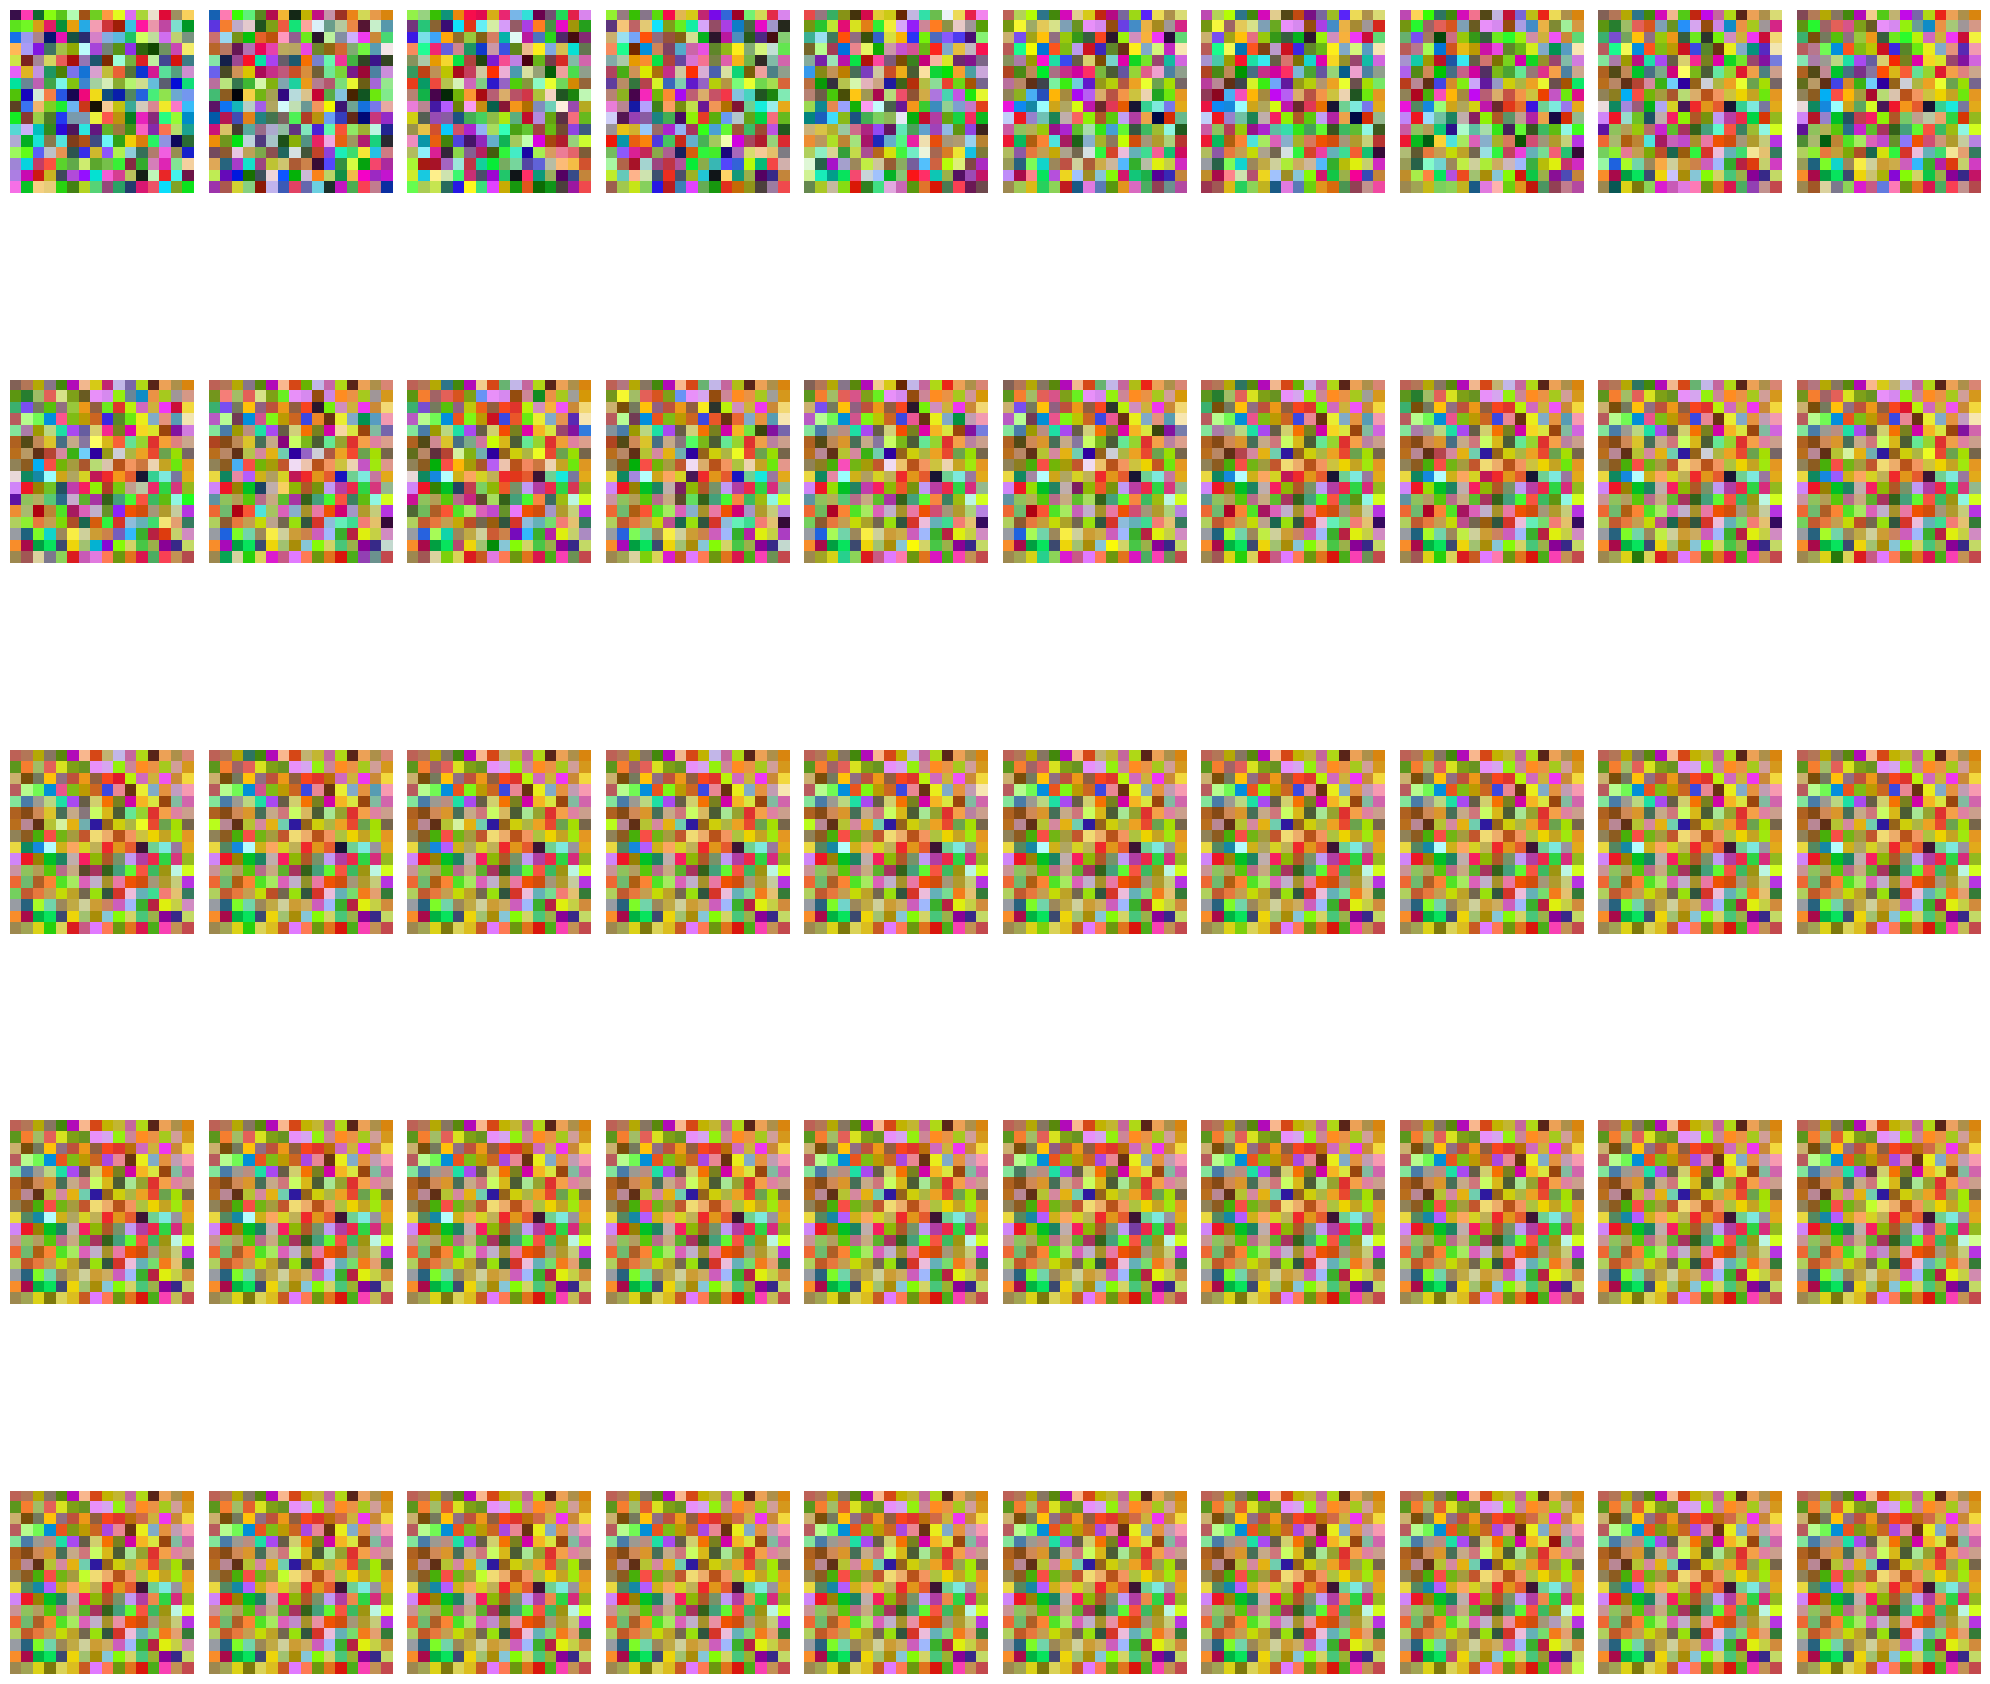

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Function to display a grid of images
def display_images(images, num_images=50, rows=10, cols=5):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 20))
    for i, ax in enumerate(axs.ravel()):
        if i < num_images:
            ax.imshow(images[i], cmap='gray')
            ax.axis('off')
        else:
            fig.delaxes(ax)
    plt.tight_layout()
    plt.show()

# Plot images:

display_images(images, rows=5, cols=10)